### XG Boost

In [1]:
import xgboost
print(xgboost.__version__)

1.3.1


In [6]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)

In [7]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df,cancer.target,test_size=0.2)

In [9]:
dtrain = xgb.DMatrix(data=X_train, label= y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [10]:
# 하이퍼 파라미터 설정
params = {'max_depth' : 3,
         'eta' : 0.1,
         'obgective' : 'binary:logistic',
         'eval_metric':'logloss',
         'early_stoppings':100
         }
num_rounds = 400

In [13]:
wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,evals=wlist)

[20:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings, obgective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60624	eval-logloss:0.61075
[1]	train-logloss:0.53701	eval-logloss:0.55037
[2]	train-logloss:0.47798	eval-logloss:0.48925
[3]	train-logloss:0.42803	eval-logloss:0.43764
[4]	train-logloss:0.38528	eval-logloss:0.40132
[5]	train-logloss:0.34836	eval-logloss:0.36399
[6]	train-logloss:0.31558	eval-logloss:0.33297
[7]	train-logloss:0.28694	eval-logloss:0.30210
[8]	train-logloss:0.26209	eval-logloss:0.27716
[9]	train-logloss:0.23942	eval-logloss:0.25431
[10]	train-logloss:0.22004	eval-logloss:0.23511
[11]	train-logloss:0.20109	eval-logloss:0.21696
[12]	train-logloss:0.18480	eva

[162]	train-logloss:0.01347	eval-logloss:0.07227
[163]	train-logloss:0.01338	eval-logloss:0.07232
[164]	train-logloss:0.01337	eval-logloss:0.07237
[165]	train-logloss:0.01327	eval-logloss:0.07227
[166]	train-logloss:0.01314	eval-logloss:0.07223
[167]	train-logloss:0.01303	eval-logloss:0.07223
[168]	train-logloss:0.01289	eval-logloss:0.07226
[169]	train-logloss:0.01287	eval-logloss:0.07230
[170]	train-logloss:0.01273	eval-logloss:0.07247
[171]	train-logloss:0.01265	eval-logloss:0.07248
[172]	train-logloss:0.01255	eval-logloss:0.07247
[173]	train-logloss:0.01240	eval-logloss:0.07250
[174]	train-logloss:0.01231	eval-logloss:0.07247
[175]	train-logloss:0.01228	eval-logloss:0.07245
[176]	train-logloss:0.01219	eval-logloss:0.07232
[177]	train-logloss:0.01212	eval-logloss:0.07238
[178]	train-logloss:0.01210	eval-logloss:0.07245
[179]	train-logloss:0.01209	eval-logloss:0.07250
[180]	train-logloss:0.01209	eval-logloss:0.07250
[181]	train-logloss:0.01201	eval-logloss:0.07250
[182]	train-logloss:

[330]	train-logloss:0.00505	eval-logloss:0.07226
[331]	train-logloss:0.00500	eval-logloss:0.07218
[332]	train-logloss:0.00494	eval-logloss:0.07214
[333]	train-logloss:0.00493	eval-logloss:0.07213
[334]	train-logloss:0.00490	eval-logloss:0.07214
[335]	train-logloss:0.00490	eval-logloss:0.07220
[336]	train-logloss:0.00487	eval-logloss:0.07221
[337]	train-logloss:0.00485	eval-logloss:0.07220
[338]	train-logloss:0.00481	eval-logloss:0.07220
[339]	train-logloss:0.00480	eval-logloss:0.07220
[340]	train-logloss:0.00475	eval-logloss:0.07215
[341]	train-logloss:0.00470	eval-logloss:0.07213
[342]	train-logloss:0.00469	eval-logloss:0.07214
[343]	train-logloss:0.00467	eval-logloss:0.07215
[344]	train-logloss:0.00465	eval-logloss:0.07213
[345]	train-logloss:0.00463	eval-logloss:0.07213
[346]	train-logloss:0.00461	eval-logloss:0.07215
[347]	train-logloss:0.00459	eval-logloss:0.07214
[348]	train-logloss:0.00456	eval-logloss:0.07215
[349]	train-logloss:0.00454	eval-logloss:0.07213
[350]	train-logloss:

In [14]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))

[ 0.06   1.005  0.842  0.967  0.004  0.188  0.988  1.022  0.998 -0.005]


In [15]:
preds = [1 if x > 0.5 else 0 for x in pred_probs]

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [17]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[40  1]
 [ 1 72]]
정확도: 0.9825, 정밀도: 0.9863, 재현율: 0.9863,    F1: 0.9863, AUC:0.9987


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

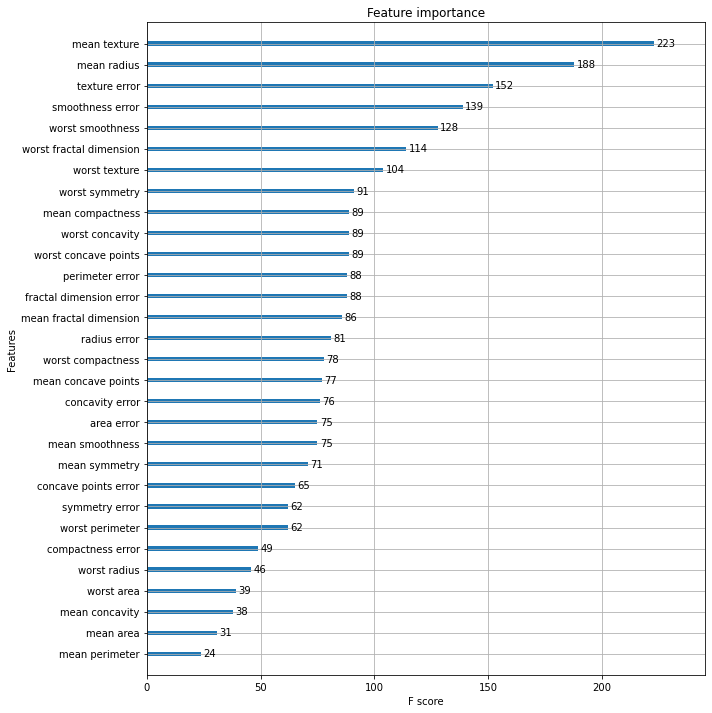

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

### XG boost sklearn wrapper

In [19]:
from xgboost import XGBClassifier
evals = [(X_test,y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=400, eval_set=evals,
               eval_metric='logloss',verbose=True)


[0]	validation_0-logloss:0.61095
[1]	validation_0-logloss:0.54999
[2]	validation_0-logloss:0.49348
[3]	validation_0-logloss:0.45067
[4]	validation_0-logloss:0.40908
[5]	validation_0-logloss:0.37252
[6]	validation_0-logloss:0.33903
[7]	validation_0-logloss:0.31203
[8]	validation_0-logloss:0.28802
[9]	validation_0-logloss:0.26634
[10]	validation_0-logloss:0.24667
[11]	validation_0-logloss:0.22981
[12]	validation_0-logloss:0.21391
[13]	validation_0-logloss:0.20062
[14]	validation_0-logloss:0.18783
[15]	validation_0-logloss:0.17514
[16]	validation_0-logloss:0.16571
[17]	validation_0-logloss:0.15634
[18]	validation_0-logloss:0.14824
[19]	validation_0-logloss:0.13884
[20]	validation_0-logloss:0.13237
[21]	validation_0-logloss:0.12558
[22]	validation_0-logloss:0.11963
[23]	validation_0-logloss:0.11542
[24]	validation_0-logloss:0.10944
[25]	validation_0-logloss:0.10723
[26]	validation_0-logloss:0.10134
[27]	validation_0-logloss:0.09654
[28]	validation_0-logloss:0.09423
[29]	validation_0-loglos

[238]	validation_0-logloss:0.03388
[239]	validation_0-logloss:0.03401
[240]	validation_0-logloss:0.03383
[241]	validation_0-logloss:0.03368
[242]	validation_0-logloss:0.03380
[243]	validation_0-logloss:0.03365
[244]	validation_0-logloss:0.03381
[245]	validation_0-logloss:0.03390
[246]	validation_0-logloss:0.03402
[247]	validation_0-logloss:0.03387
[248]	validation_0-logloss:0.03404
[249]	validation_0-logloss:0.03386
[250]	validation_0-logloss:0.03371
[251]	validation_0-logloss:0.03377
[252]	validation_0-logloss:0.03393
[253]	validation_0-logloss:0.03379
[254]	validation_0-logloss:0.03392
[255]	validation_0-logloss:0.03372
[256]	validation_0-logloss:0.03385
[257]	validation_0-logloss:0.03393
[258]	validation_0-logloss:0.03395
[259]	validation_0-logloss:0.03411
[260]	validation_0-logloss:0.03397
[261]	validation_0-logloss:0.03405
[262]	validation_0-logloss:0.03392
[263]	validation_0-logloss:0.03406
[264]	validation_0-logloss:0.03392
[265]	validation_0-logloss:0.03405
[266]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [24]:
get_clf_eval(y_test,w_preds,w_pred_proba)

오차 행렬
[[40  1]
 [ 0 73]]
정확도: 0.9912, 정밀도: 0.9865, 재현율: 1.0000,    F1: 0.9932, AUC:0.9997


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

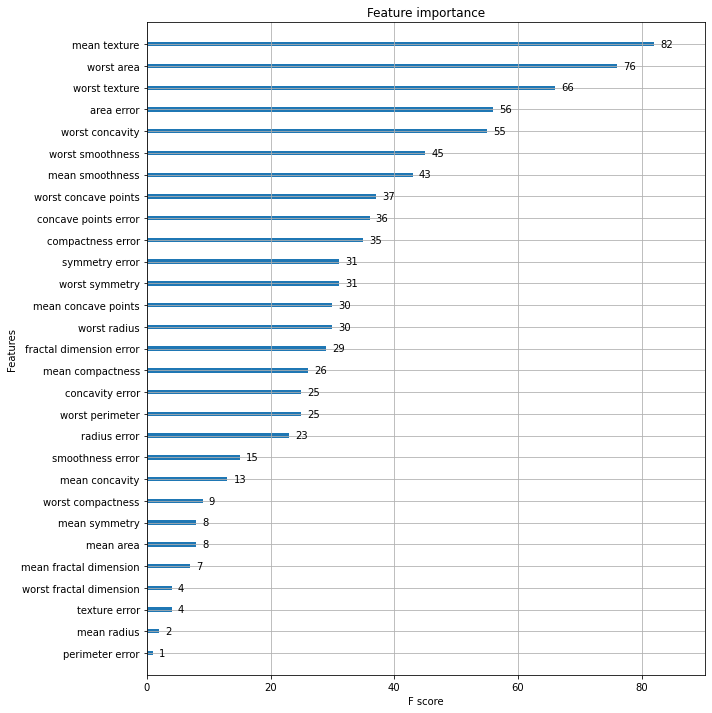

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

### LightGBM

In [26]:
import lightgbm
print(lightgbm.__version__)

3.1.1


In [27]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target


# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [28]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

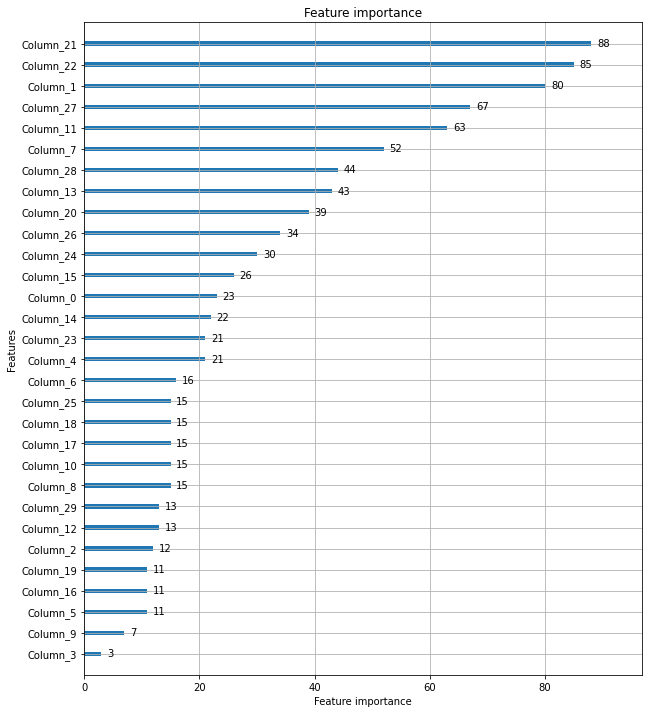

In [29]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)